<h1><center>Appendix</center></h1>

## 1. Import libraries

In [3]:
import os
import platform
import sys
import sklearn
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import datetime

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import grangercausalitytests

from sklearn.linear_model import LogisticRegression

## 2. Read Data 

In [74]:
data_28 = pd.read_csv("28 Jan.csv", delimiter = ',')


data_28['Date-Time'] = data_28['Date-Time'].apply(lambda data: pd.to_datetime(data, infer_datetime_format=True) )
data_28 = data_28.drop(['Unnamed: 0', 'Tick Dir.','num_tick_direction'], 1)






In [75]:
index_names_1 = data_28[(data_28['Type'] == 'Quote') ].index
data_28.drop(index_names_1, inplace=True)

index_names_2 = data_28[(data_28['Bid Price'] > data_28['Ask Price'])].index
data_28.drop(index_names_2, inplace=True)

index_names_3 = data_28[(data_28['Price'] > data_28['Ask Price'])].index
data_28.drop(index_names_3, inplace=True)


#create num tick direction
data_28['diff Price/Bid'] = np.absolute(data_28['Price'] - data_28['Bid Price'])
data_28['diff Price/Ask'] = np.absolute(data_28['Price'] - data_28['Ask Price'])

data_28['Tick Dir'] = 1
data_28.loc[abs(data_28['diff Price/Bid']) < abs(data_28['diff Price/Ask']), 'Tick Dir'] = -1

#Calculate Quote Spread
data_28['Quote spread'] = (data_28['Ask Price'] - data_28['Bid Price'])
#Calculate Mid quote
data_28['Mid quote'] = (data_28['Ask Price'] + data_28['Bid Price'])/2
#Calculate relative Quote Spread
data_28['Relative Quote spread'] = data_28['Quote spread']/data_28['Mid quote']
#Calculate effective spread
data_28['Effective spread'] = np.absolute(2*(data_28['Price']-data_28['Mid quote'])/data_28['Mid quote'])




data_28


#RIC        Domain                           Date-Time   Type  \
0       GME.N  Market Price 2021-01-28 09:30:28.291493819-05:00  Trade   
1       GME.N  Market Price 2021-01-28 09:30:28.291493819-05:00  Trade   
4       GME.N  Market Price 2021-01-28 09:30:28.376170108-05:00  Trade   
6       GME.N  Market Price 2021-01-28 09:30:28.384200825-05:00  Trade   
7       GME.N  Market Price 2021-01-28 09:30:28.395520961-05:00  Trade   
...       ...           ...                                 ...    ...   
336170  GME.N  Market Price 2021-01-28 15:59:41.632737339-05:00  Trade   
336173  GME.N  Market Price 2021-01-28 15:59:41.632737339-05:00  Trade   
336175  GME.N  Market Price 2021-01-28 15:59:41.692460383-05:00  Trade   
336176  GME.N  Market Price 2021-01-28 15:59:41.712323204-05:00  Trade   
336179  GME.N  Market Price 2021-01-28 15:59:41.732202827-05:00  Trade   

         Price    Volume  Bid Price  Bid Size  Ask Price  Ask Size  \
0       289.99  528491.0     345.00       2.0     346.82       6.0   
1       289.99       0.0     345.00       2.0     346.82       6.0   
4       289.67       1.0     288.00       1.0     290.00      10.0   
6       289.67       9.0     287.70       1.0     290.00      10.0   
7       289.33       3.0     287.70       1.0     290.00      10.0   
...        ...       ...        ...       ...        ...       ...   
336170  197.44       1.0     197.14       1.0     197.44     136.0   
336173  197.44       1.0     197.14       1.0     197.44     136.0   
336175  197.44       3.0     197.14       1.0     197.44     136.0   
336176  197.44       2.0     197.14       1.0     197.44     136.0   
336179  197.44       1.0     197.14       1.0     197.44     136.0   

              Date          Exchange_Time  diff Price/Bid  diff Price/Ask  \
0       2021-01-28  09:30:28.291493819-05           55.01           56.83   
1       2021-01-28  09:30:28.291493819-05           55.01           56.83   
4       2021-01-28  09:30:28.376170108-05            1.67            0.33   
6       2021-01-28  09:30:28.384200825-05            1.97            0.33   
7       2021-01-28  09:30:28.395520961-05            1.63            0.67   
...            ...                    ...             ...             ...   
336170  2021-01-28  15:59:41.632737339-05            0.30            0.00   
336173  2021-01-28  15:59:41.632737339-05            0.30            0.00   
336175  2021-01-28  15:59:41.692460383-05            0.30            0.00   
336176  2021-01-28  15:59:41.712323204-05            0.30            0.00   
336179  2021-01-28  15:59:41.732202827-05            0.30            0.00   

        Tick Dir  Quote spread  Mid quote  Relative Quote spread  \
0             -1          1.82     345.91               0.005261   
1             -1          1.82     345.91               0.005261   
4              1          2.00     289.00               0.006920   
6              1          2.30     288.85               0.007963   
7              1          2.30     288.85               0.007963   
...          ...           ...        ...                    ...   
336170         1          0.30     197.29               0.001521   
336173         1          0.30     197.29               0.001521   
336175         1          0.30     197.29               0.001521   
336176         1          0.30     197.29               0.001521   
336179         1          0.30     197.29               0.001521   

        Effective spread  
0               0.323321  
1               0.323321  
4               0.004637  
6               0.005678  
7               0.003324  
...                  ...  
336170          0.001521  
336173          0.001521  
336175          0.001521  
336176          0.001521  
336179          0.001521  

[224682 rows x 19 columns]

## 3. Calculate Quoted spread and Effective Spread and Mid quote

- Calculate Quoted spread and Effective Spread by use the volumn average in each Time interval (10 Seconds).
- Calculate Mid quote by use the last mid quote in each Time interval (10 Seconds).

In [76]:
data_28['Quote_spread_V'] = data_28['Quote spread']*data_28['Volume']
data_28['Relative_Quote_spread_V'] = data_28['Relative Quote spread']*data_28['Volume']
data_28['Effective_spread_V'] = data_28['Effective spread']*data_28['Volume']

In [77]:
Quote_spread_V = data_28.resample('10S', on='Date-Time')['Quote_spread_V'].sum()

Relative_Quote_spread_V = data_28.resample('10S', on='Date-Time')['Relative_Quote_spread_V'].sum()

Effective_spread_V = data_28.resample('10S', on='Date-Time')['Effective_spread_V'].sum()

sum_volume = data_28.resample('10S', on='Date-Time')['Volume'].sum()

last_midquote = data_28.resample('10S', on='Date-Time')['Mid quote'].last()

data_intvl = pd.concat([Quote_spread_V,Relative_Quote_spread_V,Effective_spread_V, sum_volume,first_midquote,last_midquote], 
                       keys=['Quote_spread_V','Relative_Quote_spread_V','Effective_spread_V', 'Volume','first_midquote','last_midquote'], axis=1)

data_intvl
data_intvl = data_intvl.reset_index(level=0)
data_intvl

Date-Time  Quote_spread_V  Relative_Quote_spread_V  \
0    2021-01-28 09:30:20-05:00       963012.12              2784.730991   
1    2021-01-28 09:30:30-05:00        43567.99               163.071608   
2    2021-01-28 09:30:40-05:00        96108.04               355.680090   
3    2021-01-28 09:30:50-05:00        88796.03               310.412276   
4    2021-01-28 09:31:00-05:00       115695.38               393.872370   
...                        ...             ...                      ...   
4671 2021-01-29 15:59:10-05:00             NaN                      NaN   
4672 2021-01-29 15:59:20-05:00             NaN                      NaN   
4673 2021-01-29 15:59:30-05:00             NaN                      NaN   
4674 2021-01-29 15:59:40-05:00             NaN                      NaN   
4675 2021-01-29 15:59:50-05:00             NaN                      NaN   

      Effective_spread_V    Volume  first_midquote  last_midquote  
0          170874.955690  567387.0             NaN        270.005  
1             149.351158   42516.0             NaN        267.595  
2             287.463914   15769.0             NaN        276.570  
3             200.736965   13257.0             NaN        291.495  
4             202.689798   13382.0             NaN        295.000  
...                  ...       ...             ...            ...  
4671                 NaN       NaN         329.475            NaN  
4672                 NaN       NaN         329.495            NaN  
4673                 NaN       NaN         328.970            NaN  
4674                 NaN       NaN         328.235            NaN  
4675                 NaN       NaN         328.495            NaN  

[4676 rows x 7 columns]

In [78]:
# Calculate avverage spread

# Volume average Quoted spread
data_intvl['intvl Quote spread'] = data_intvl['Quote_spread_V']/data_intvl['Volume']
data_intvl['intvl Relative Quote spread'] = data_intvl['Relative_Quote_spread_V']/data_intvl['Volume']
data_intvl['intvl Effective spread'] = data_intvl['Effective_spread_V']/data_intvl['Volume']
data_intvl

Date-Time  Quote_spread_V  Relative_Quote_spread_V  \
0    2021-01-28 09:30:20-05:00       963012.12              2784.730991   
1    2021-01-28 09:30:30-05:00        43567.99               163.071608   
2    2021-01-28 09:30:40-05:00        96108.04               355.680090   
3    2021-01-28 09:30:50-05:00        88796.03               310.412276   
4    2021-01-28 09:31:00-05:00       115695.38               393.872370   
...                        ...             ...                      ...   
4671 2021-01-29 15:59:10-05:00             NaN                      NaN   
4672 2021-01-29 15:59:20-05:00             NaN                      NaN   
4673 2021-01-29 15:59:30-05:00             NaN                      NaN   
4674 2021-01-29 15:59:40-05:00             NaN                      NaN   
4675 2021-01-29 15:59:50-05:00             NaN                      NaN   

      Effective_spread_V    Volume  first_midquote  last_midquote  \
0          170874.955690  567387.0             NaN        270.005   
1             149.351158   42516.0             NaN        267.595   
2             287.463914   15769.0             NaN        276.570   
3             200.736965   13257.0             NaN        291.495   
4             202.689798   13382.0             NaN        295.000   
...                  ...       ...             ...            ...   
4671                 NaN       NaN         329.475            NaN   
4672                 NaN       NaN         329.495            NaN   
4673                 NaN       NaN         328.970            NaN   
4674                 NaN       NaN         328.235            NaN   
4675                 NaN       NaN         328.495            NaN   

      intvl Quote spread  intvl Relative Quote spread  intvl Effective spread  
0               1.697276                     0.004908                0.301161  
1               1.024743                     0.003836                0.003513  
2               6.094745                     0.022556                0.018230  
3               6.698049                     0.023415                0.015142  
4               8.645597                     0.029433                0.015146  
...                  ...                          ...                     ...  
4671                 NaN                          NaN                     NaN  
4672                 NaN                          NaN                     NaN  
4673                 NaN                          NaN                     NaN  
4674                 NaN                          NaN                     NaN  
4675                 NaN                          NaN                     NaN  

[4676 rows x 10 columns]

## 4. Visualise the data

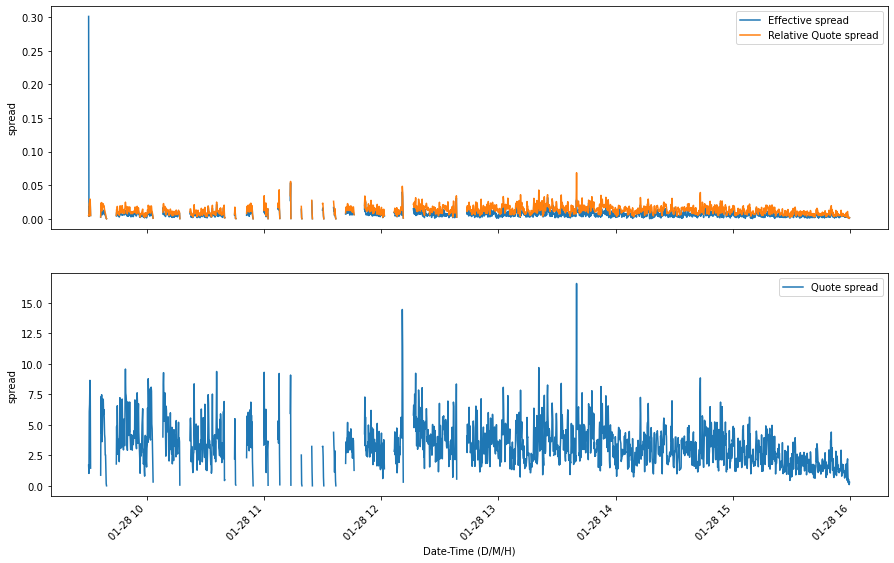

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

fig, ax = plt.subplots(2,1, figsize=(15,10))
fig.autofmt_xdate()
ax[0].plot(data_intvl['Date-Time'], data_intvl['intvl Effective spread'], label = 'Effective spread')
ax[0].plot(data_intvl['Date-Time'],data_intvl['intvl Relative Quote spread'], label = 'Relative Quote spread')
ax[0].legend()
plt.xlabel('Date-Time (D/M/H)')
plt.xticks(rotation=45)
ax[0].set_ylabel('spread')
ax[1].plot(data_intvl['Date-Time'],data_intvl['intvl Quote spread'], label = 'Quote spread')
ax[1].set_ylabel('spread')
ax[1].legend()


## 5. Calculate OIB# and OIB$

In [80]:
data = data_28[['Price', 'Tick Dir', 'Date-Time']]
data = data.groupby('Tick Dir')

num_tick_ = data.resample('10S', on='Date-Time').count()
num_tick_sum = data.resample('10S', on='Date-Time').sum()
data_buyer = num_tick_.loc[1 , :]
data_seller = num_tick_.loc[-1 , :]
No_buyer = data_buyer['Tick Dir']
No_buyer = No_buyer.reset_index(level=0)
No_seller = data_seller['Tick Dir']
No_seller = No_seller.reset_index(level=0)



data_buyer_sum = num_tick_sum.loc[1 , :]
data_seller_sum = num_tick_sum.loc[-1 , :]
dollar_buyer = data_buyer_sum['Price']
dollar_buyer = dollar_buyer.reset_index(level=0)
dollar_seller = data_seller_sum['Price']
dollar_seller = dollar_seller.reset_index(level=0)


In [81]:

data_intvl.insert(1, "No_buyer", No_buyer['Tick Dir'])
data_intvl.insert(1, "No_seller", No_seller['Tick Dir'])
data_intvl.insert(1, "dollar_buyer", dollar_buyer['Price'])
data_intvl.insert(1, "dollar_seller", dollar_seller['Price'])


In [82]:
data_intvl['OIB#'] = (data_intvl['No_buyer']-data_intvl['No_seller'])/(data_intvl['No_buyer']+data_intvl['No_seller'])
data_intvl['OIB$'] = (data_intvl['dollar_buyer']-data_intvl['dollar_seller'])/(data_intvl['dollar_buyer']+data_intvl['dollar_seller'])

In [83]:
data_intvl

Date-Time  dollar_seller  dollar_buyer  No_seller  \
0    2021-01-28 09:30:20-05:00     584566.120      25270.56     2112.0   
1    2021-01-28 09:30:30-05:00     191171.800      51349.37      714.0   
2    2021-01-28 09:30:40-05:00      76027.385     126524.84      281.0   
3    2021-01-28 09:30:50-05:00      83130.710     231465.98      289.0   
4    2021-01-28 09:31:00-05:00     178602.060     278770.09      609.0   
...                        ...            ...           ...        ...   
4671 2021-01-29 15:59:10-05:00            NaN           NaN        NaN   
4672 2021-01-29 15:59:20-05:00            NaN           NaN        NaN   
4673 2021-01-29 15:59:30-05:00            NaN           NaN        NaN   
4674 2021-01-29 15:59:40-05:00            NaN           NaN        NaN   
4675 2021-01-29 15:59:50-05:00            NaN           NaN        NaN   

      No_buyer  Quote_spread_V  Relative_Quote_spread_V  Effective_spread_V  \
0         91.0       963012.12              2784.730991       170874.955690   
1        191.0        43567.99               163.071608          149.351158   
2        459.0        96108.04               355.680090          287.463914   
3        806.0        88796.03               310.412276          200.736965   
4        942.0       115695.38               393.872370          202.689798   
...        ...             ...                      ...                 ...   
4671       NaN             NaN                      NaN                 NaN   
4672       NaN             NaN                      NaN                 NaN   
4673       NaN             NaN                      NaN                 NaN   
4674       NaN             NaN                      NaN                 NaN   
4675       NaN             NaN                      NaN                 NaN   

        Volume  first_midquote  last_midquote  intvl Quote spread  \
0     567387.0             NaN        270.005            1.697276   
1      42516.0             NaN        267.595            1.024743   
2      15769.0             NaN        276.570            6.094745   
3      13257.0             NaN        291.495            6.698049   
4      13382.0             NaN        295.000            8.645597   
...        ...             ...            ...                 ...   
4671       NaN         329.475            NaN                 NaN   
4672       NaN         329.495            NaN                 NaN   
4673       NaN         328.970            NaN                 NaN   
4674       NaN         328.235            NaN                 NaN   
4675       NaN         328.495            NaN                 NaN   

      intvl Relative Quote spread  intvl Effective spread      OIB#      OIB$  
0                        0.004908                0.301161 -0.917385 -0.917124  
1                        0.003836                0.003513 -0.577901 -0.576537  
2                        0.022556                0.018230  0.240541  0.249306  
3                        0.023415                0.015142  0.472146  0.471509  
4                        0.029433                0.015146  0.214700  0.219008  
...                           ...                     ...       ...       ...  
4671                          NaN                     NaN       NaN       NaN  
4672                          NaN                     NaN       NaN       NaN  
4673                          NaN                     NaN       NaN       NaN  
4674                          NaN                     NaN       NaN       NaN  
4675                          NaN                     NaN       NaN       NaN  

[4676 rows x 16 columns]

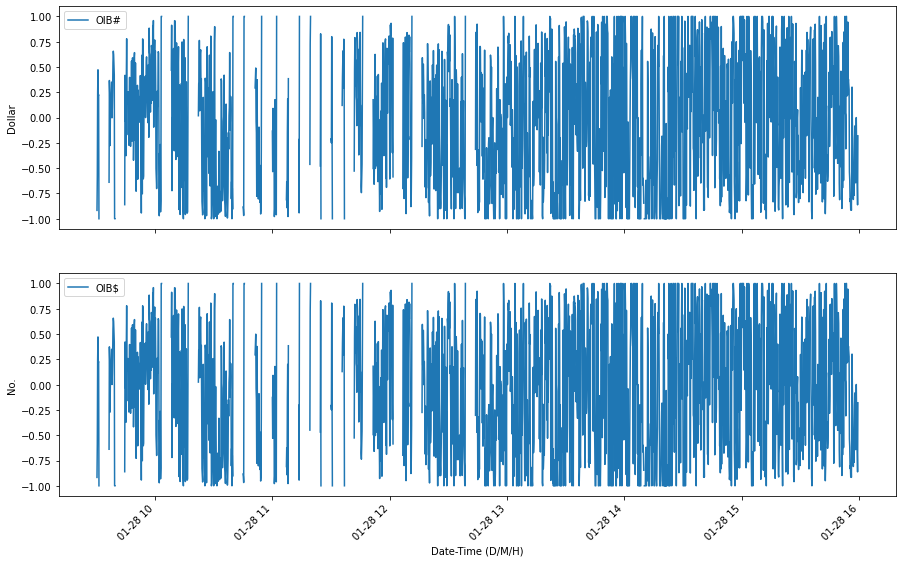

In [84]:


fig, ax = plt.subplots(2,1, figsize=(15,10))
fig.autofmt_xdate()
ax[0].plot(data_intvl['Date-Time'], data_intvl['OIB#'], label = 'OIB#')
ax[0].legend()
plt.xlabel('Date-Time (D/M/H)')
plt.xticks(rotation=45)
ax[0].set_ylabel('Dollar')
ax[1].plot(data_intvl['Date-Time'],data_intvl['OIB$'], label = 'OIB$')
ax[1].set_ylabel('No.')
ax[1].legend()

## 5. Basic Regression

10 seconds returns are computed by using equation 3

In [85]:
# calculate return

data_intvl['Returns'] = (data_intvl['last_midquote']/data_intvl['last_midquote'].shift(1))-1
data_intvl

Date-Time  dollar_seller  dollar_buyer  No_seller  \
0    2021-01-28 09:30:20-05:00     584566.120      25270.56     2112.0   
1    2021-01-28 09:30:30-05:00     191171.800      51349.37      714.0   
2    2021-01-28 09:30:40-05:00      76027.385     126524.84      281.0   
3    2021-01-28 09:30:50-05:00      83130.710     231465.98      289.0   
4    2021-01-28 09:31:00-05:00     178602.060     278770.09      609.0   
...                        ...            ...           ...        ...   
4671 2021-01-29 15:59:10-05:00            NaN           NaN        NaN   
4672 2021-01-29 15:59:20-05:00            NaN           NaN        NaN   
4673 2021-01-29 15:59:30-05:00            NaN           NaN        NaN   
4674 2021-01-29 15:59:40-05:00            NaN           NaN        NaN   
4675 2021-01-29 15:59:50-05:00            NaN           NaN        NaN   

      No_buyer  Quote_spread_V  Relative_Quote_spread_V  Effective_spread_V  \
0         91.0       963012.12              2784.730991       170874.955690   
1        191.0        43567.99               163.071608          149.351158   
2        459.0        96108.04               355.680090          287.463914   
3        806.0        88796.03               310.412276          200.736965   
4        942.0       115695.38               393.872370          202.689798   
...        ...             ...                      ...                 ...   
4671       NaN             NaN                      NaN                 NaN   
4672       NaN             NaN                      NaN                 NaN   
4673       NaN             NaN                      NaN                 NaN   
4674       NaN             NaN                      NaN                 NaN   
4675       NaN             NaN                      NaN                 NaN   

        Volume  first_midquote  last_midquote  intvl Quote spread  \
0     567387.0             NaN        270.005            1.697276   
1      42516.0             NaN        267.595            1.024743   
2      15769.0             NaN        276.570            6.094745   
3      13257.0             NaN        291.495            6.698049   
4      13382.0             NaN        295.000            8.645597   
...        ...             ...            ...                 ...   
4671       NaN         329.475            NaN                 NaN   
4672       NaN         329.495            NaN                 NaN   
4673       NaN         328.970            NaN                 NaN   
4674       NaN         328.235            NaN                 NaN   
4675       NaN         328.495            NaN                 NaN   

      intvl Relative Quote spread  intvl Effective spread      OIB#      OIB$  \
0                        0.004908                0.301161 -0.917385 -0.917124   
1                        0.003836                0.003513 -0.577901 -0.576537   
2                        0.022556                0.018230  0.240541  0.249306   
3                        0.023415                0.015142  0.472146  0.471509   
4                        0.029433                0.015146  0.214700  0.219008   
...                           ...                     ...       ...       ...   
4671                          NaN                     NaN       NaN       NaN   
4672                          NaN                     NaN       NaN       NaN   
4673                          NaN                     NaN       NaN       NaN   
4674                          NaN                     NaN       NaN       NaN   
4675                          NaN                     NaN       NaN       NaN   

       Returns  
0          NaN  
1    -0.008926  
2     0.033539  
3     0.053965  
4     0.012024  
...        ...  
4671       NaN  
4672       NaN  
4673       NaN  
4674       NaN  
4675       NaN  

[4676 rows x 17 columns]

In [86]:
#Define low liquidity of intvl effective sprerad < mean effective spread + 1 SD
#0 FOR LOW LIQID DAY, 1 for low liquid

data_intvl['ILD'] = 0
data_intvl.loc[(data_intvl['intvl Effective spread'] > 0.007103+0.008365), 'ILD'] = 1

# Create linear Regression model by using 2 X dimension i.e. OIB$(t-1) and OIB$(t-1)*ILD
X = pd.DataFrame() 
X['OIB'] = data_intvl['OIB$'].shift(1)
X = X.drop(0, 0).reset_index().drop('index',1) 
X['OIBILD'] = X['OIB']*data_intvl['ILD']
X = X[ np.isfinite( X ).all( axis = 1) ]
y = pd.DataFrame()
y['Returns'] = data_intvl['Returns']
y = y[ np.isfinite( y ).all( axis = 1) ]
trn = X.merge(y, left_index=True, right_index=True)

X_train = trn.drop('Returns',1)
y_train = trn["Returns"]





In [87]:
from statsmodels.formula.api import ols
lm1 = ols('Returns~ OIB',data=trn).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     394.8
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           1.85e-79
Time:                        23:34:41   Log-Likelihood:                 5402.4
No. Observations:                1769   AIC:                        -1.080e+04
Df Residuals:                    1767   BIC:                        -1.079e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    7.73e-05      0.000      0.284      0.776      -0.000       0.001
OIB            0.0084      0.000     19.870      0.000       0.008       0.009
==============================================================================
Omnibus:                      353.371   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7305.179
Skew:                          -0.353   Prob(JB):                         0.00
Kurtosis:                      12.930   Cond. No.                         1.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
lm2 = ols('Returns~ OIB+OIBILD',data=trn).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     265.1
Date:                Sun, 10 Apr 2022   Prob (F-statistic):          2.17e-101
Time:                        23:34:41   Log-Likelihood:                 5456.2
No. Observations:                1769   AIC:                        -1.091e+04
Df Residuals:                    1766   BIC:                        -1.089e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0004      0.000      1.650      0.099   -8.28e-05       0.001
OIB            0.0072      0.000     16.967      0.000       0.006       0.008
OIBILD         0.0168      0.002     10.524      0.000       0.014       0.020
==============================================================================
Omnibus:                      299.598   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5827.164
Skew:                           0.060   Prob(JB):                         0.00
Kurtosis:                      11.891   Cond. No.                         6.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Granger Causility test


In [89]:
trn = X.merge(data_intvl['intvl Effective spread'], left_index=True, right_index=True)
grangercausalitytests(trn[['OIBILD', 'intvl Effective spread']], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1962  , p=0.6578  , df_denom=1788, df_num=1
ssr based chi2 test:   chi2=0.1966  , p=0.6575  , df=1
likelihood ratio test: chi2=0.1966  , p=0.6575  , df=1
parameter F test:         F=0.1962  , p=0.6578  , df_denom=1788, df_num=1


{1: ({'ssr_ftest': (0.19623343969486187, 0.6578320261153843, 1788.0, 1),
   'ssr_chi2test': (0.1965626904326049, 0.6575097669938275, 1),
   'lrtest': (0.19655190481262252, 0.6575185638748684, 1),
   'params_ftest': (0.19623343968722953, 0.6578320261217048, 1788.0, 1.0)},
   array([[0., 1., 0.]])])}

In [90]:
grangercausalitytests(trn[['intvl Effective spread','OIBILD' ]], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.9434  , p=0.0049  , df_denom=1788, df_num=1
ssr based chi2 test:   chi2=7.9567  , p=0.0048  , df=1
likelihood ratio test: chi2=7.9391  , p=0.0048  , df=1
parameter F test:         F=7.9434  , p=0.0049  , df_denom=1788, df_num=1


{1: ({'ssr_ftest': (7.943400750624677, 0.004879427980016204, 1788.0, 1),
   'ssr_chi2test': (7.956728604233107, 0.0047908929740595255, 1),
   'lrtest': (7.939106425019418, 0.004837771772242654, 1),
   'params_ftest': (7.94340075062406, 0.0048794279800184834, 1788.0, 1.0)},
   array([[0., 1., 0.]])])}

/pagebreak

# 27 Jan 2021

In [25]:
data = pd.read_csv("27 Jan.csv", delimiter = ',')


data['Date-Time'] = data['Date-Time'].apply(lambda data: pd.to_datetime(data, infer_datetime_format=True) )
data = data.drop(['Unnamed: 0', 'Tick Dir.','num_tick_direction'], 1)






In [26]:
index_names_1 = data[(data['Type'] == 'Quote') ].index
data.drop(index_names_1, inplace=True)

index_names_2 = data[(data['Bid Price'] > data['Ask Price'])].index
data.drop(index_names_2, inplace=True)

index_names_3 = data[(data['Price'] > data['Ask Price'])].index
data.drop(index_names_3, inplace=True)


#create num tick direction
data['diff Price/Bid'] = np.absolute(data['Price'] - data['Bid Price'])
data['diff Price/Ask'] = np.absolute(data['Price'] - data['Ask Price'])

data['Tick Dir'] = 1
data.loc[abs(data['diff Price/Bid']) < abs(data['diff Price/Ask']), 'Tick Dir'] = -1

#Calculate Quote Spread
data['Quote spread'] = (data['Ask Price'] - data['Bid Price'])
#Calculate Mid quote
data['Mid quote'] = (data['Ask Price'] + data['Bid Price'])/2
#Calculate relative Quote Spread
data['Relative Quote spread'] = data['Quote spread']/data['Mid quote']
#Calculate effective spread
data['Effective spread'] = np.absolute(2*(data['Price']-data['Mid quote'])/data['Mid quote'])




data


#RIC        Domain                           Date-Time   Type  \
2       GME.N  Market Price 2021-01-27 09:43:51.232058291-05:00  Trade   
3       GME.N  Market Price 2021-01-27 09:43:51.232058291-05:00  Trade   
5       GME.N  Market Price 2021-01-27 09:43:51.359561817-05:00  Trade   
8       GME.N  Market Price 2021-01-27 09:43:51.359561817-05:00  Trade   
9       GME.N  Market Price 2021-01-27 09:43:51.359561817-05:00  Trade   
...       ...           ...                                 ...    ...   
370310  GME.N  Market Price 2021-01-27 15:59:59.880443607-05:00  Trade   
370313  GME.N  Market Price 2021-01-27 15:59:59.884220244-05:00  Trade   
370315  GME.N  Market Price 2021-01-27 15:59:59.884220244-05:00  Trade   
370332  GME.N  Market Price 2021-01-27 15:59:59.972914471-05:00  Trade   
370337  GME.N  Market Price 2021-01-27 15:59:59.980891435-05:00  Trade   

         Price     Volume  Bid Price  Bid Size  Ask Price  Ask Size  \
2       293.00  1287888.0     275.00       0.0     300.00       0.0   
3       293.00        0.0     275.00       0.0     300.00       0.0   
5       293.35       10.0     292.99       2.0     293.72       3.0   
8       293.35        2.0     292.99       2.0     293.72       2.0   
9       293.35       31.0     292.99       2.0     293.72       2.0   
...        ...        ...        ...       ...        ...       ...   
370310  345.00       97.0     345.00       4.0     347.02       1.0   
370313  345.00       16.0     345.00       2.0     347.02       1.0   
370315  345.00        1.0     345.00       2.0     347.02       1.0   
370332  345.00        3.0     345.00       2.0     346.87       1.0   
370337  346.84       10.0     345.00       2.0     346.84       1.0   

              Date          Exchange_Time  diff Price/Bid  diff Price/Ask  \
2       2021-01-27  09:43:51.232058291-05           18.00            7.00   
3       2021-01-27  09:43:51.232058291-05           18.00            7.00   
5       2021-01-27  09:43:51.359561817-05            0.36            0.37   
8       2021-01-27  09:43:51.359561817-05            0.36            0.37   
9       2021-01-27  09:43:51.359561817-05            0.36            0.37   
...            ...                    ...             ...             ...   
370310  2021-01-27  15:59:59.880443607-05            0.00            2.02   
370313  2021-01-27  15:59:59.884220244-05            0.00            2.02   
370315  2021-01-27  15:59:59.884220244-05            0.00            2.02   
370332  2021-01-27  15:59:59.972914471-05            0.00            1.87   
370337  2021-01-27  15:59:59.980891435-05            1.84            0.00   

        Tick Dir  Quote spread  Mid quote  Relative Quote spread  \
2              1         25.00    287.500               0.086957   
3              1         25.00    287.500               0.086957   
5             -1          0.73    293.355               0.002488   
8             -1          0.73    293.355               0.002488   
9             -1          0.73    293.355               0.002488   
...          ...           ...        ...                    ...   
370310        -1          2.02    346.010               0.005838   
370313        -1          2.02    346.010               0.005838   
370315        -1          2.02    346.010               0.005838   
370332        -1          1.87    345.935               0.005406   
370337         1          1.84    345.920               0.005319   

        Effective spread  
2               0.038261  
3               0.038261  
5               0.000034  
8               0.000034  
9               0.000034  
...                  ...  
370310          0.005838  
370313          0.005838  
370315          0.005838  
370332          0.005406  
370337          0.005319  

[219774 rows x 19 columns]

## Calculate Quoted spread and Effective Spread by use the volumn average in each Time interval (1 Seconds)

In [27]:
data['Quote_spread_V'] = data['Quote spread']*data['Volume']
data['Relative_Quote_spread_V'] = data['Relative Quote spread']*data['Volume']
data['Effective_spread_V'] = data['Effective spread']*data['Volume']

In [28]:
Quote_spread_V = data.resample('10S', on='Date-Time')['Quote_spread_V'].sum()

Relative_Quote_spread_V = data.resample('10S', on='Date-Time')['Relative_Quote_spread_V'].sum()

Effective_spread_V = data.resample('10S', on='Date-Time')['Effective_spread_V'].sum()

sum_volume = data.resample('10S', on='Date-Time')['Volume'].sum()

first_midquote = data.resample('10S', on='Date-Time')['Mid quote'].first()

last_midquote = data.resample('10S', on='Date-Time')['Mid quote'].last()

data_intvl = pd.concat([Quote_spread_V,Relative_Quote_spread_V,Effective_spread_V, sum_volume,first_midquote,last_midquote], 
                       keys=['Quote_spread_V','Relative_Quote_spread_V','Effective_spread_V', 'Volume','first_midquote','last_midquote'], axis=1)

data_intvl
data_intvl = data_intvl.reset_index(level=0)
# data_intvl['Quote Spread']
data_intvl

Date-Time  Quote_spread_V  Relative_Quote_spread_V  \
0    2021-01-27 09:43:50-05:00     33827962.19            117428.012502   
1    2021-01-27 09:44:00-05:00       195476.81               639.333753   
2    2021-01-27 09:44:10-05:00       124540.11               397.249834   
3    2021-01-27 09:44:20-05:00       144638.70               452.929426   
4    2021-01-27 09:44:30-05:00        46894.53               149.359187   
...                        ...             ...                      ...   
2252 2021-01-27 15:59:10-05:00        17988.11                51.618839   
2253 2021-01-27 15:59:20-05:00        11072.04                31.666026   
2254 2021-01-27 15:59:30-05:00        22395.09                64.123909   
2255 2021-01-27 15:59:40-05:00        50352.34               144.437982   
2256 2021-01-27 15:59:50-05:00        47002.93               135.091835   

      Effective_spread_V     Volume  first_midquote  last_midquote  
0           54555.433604  1533799.0         287.500        307.000  
1             571.686544    26233.0         307.000        310.960  
2             367.456952    35530.0         310.960        317.535  
3             386.904820    51490.0         317.535        314.170  
4              73.415828     4037.0         314.170        313.415  
...                  ...        ...             ...            ...  
2252           37.529442    23632.0         349.125        349.220  
2253           24.747892    26682.0         349.375        349.850  
2254           45.835966    28696.0         349.850        348.150  
2255          112.996243    30273.0         348.150        349.630  
2256           89.914195    26943.0         349.630        345.920  

[2257 rows x 7 columns]

In [29]:
# Calculate avg spread

# Volume avg Quoted spread
data_intvl['intvl Quote spread'] = data_intvl['Quote_spread_V']/data_intvl['Volume']
data_intvl['intvl Relative Quote spread'] = data_intvl['Relative_Quote_spread_V']/data_intvl['Volume']
data_intvl['intvl Effective spread'] = data_intvl['Effective_spread_V']/data_intvl['Volume']
data_intvl

Date-Time  Quote_spread_V  Relative_Quote_spread_V  \
0    2021-01-27 09:43:50-05:00     33827962.19            117428.012502   
1    2021-01-27 09:44:00-05:00       195476.81               639.333753   
2    2021-01-27 09:44:10-05:00       124540.11               397.249834   
3    2021-01-27 09:44:20-05:00       144638.70               452.929426   
4    2021-01-27 09:44:30-05:00        46894.53               149.359187   
...                        ...             ...                      ...   
2252 2021-01-27 15:59:10-05:00        17988.11                51.618839   
2253 2021-01-27 15:59:20-05:00        11072.04                31.666026   
2254 2021-01-27 15:59:30-05:00        22395.09                64.123909   
2255 2021-01-27 15:59:40-05:00        50352.34               144.437982   
2256 2021-01-27 15:59:50-05:00        47002.93               135.091835   

      Effective_spread_V     Volume  first_midquote  last_midquote  \
0           54555.433604  1533799.0         287.500        307.000   
1             571.686544    26233.0         307.000        310.960   
2             367.456952    35530.0         310.960        317.535   
3             386.904820    51490.0         317.535        314.170   
4              73.415828     4037.0         314.170        313.415   
...                  ...        ...             ...            ...   
2252           37.529442    23632.0         349.125        349.220   
2253           24.747892    26682.0         349.375        349.850   
2254           45.835966    28696.0         349.850        348.150   
2255          112.996243    30273.0         348.150        349.630   
2256           89.914195    26943.0         349.630        345.920   

      intvl Quote spread  intvl Relative Quote spread  intvl Effective spread  
0              22.055016                     0.076560                0.035569  
1               7.451561                     0.024371                0.021793  
2               3.505210                     0.011181                0.010342  
3               2.809064                     0.008796                0.007514  
4              11.616183                     0.036998                0.018186  
...                  ...                          ...                     ...  
2252            0.761176                     0.002184                0.001588  
2253            0.414963                     0.001187                0.000928  
2254            0.780425                     0.002235                0.001597  
2255            1.663276                     0.004771                0.003733  
2256            1.744532                     0.005014                0.003337  

[2257 rows x 10 columns]

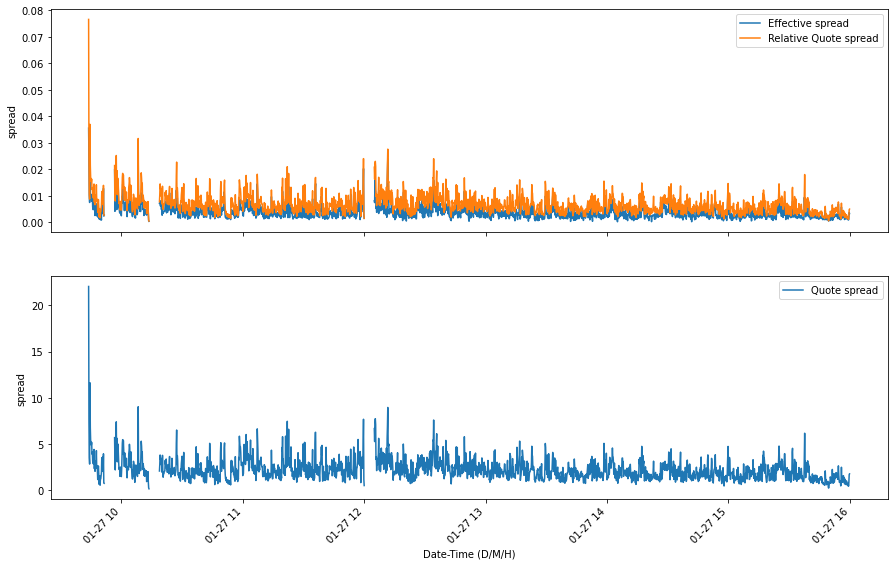

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

fig, ax = plt.subplots(2,1, figsize=(15,10))
fig.autofmt_xdate()
ax[0].plot(data_intvl['Date-Time'], data_intvl['intvl Effective spread'], label = 'Effective spread')
ax[0].plot(data_intvl['Date-Time'],data_intvl['intvl Relative Quote spread'], label = 'Relative Quote spread')
ax[0].legend()
plt.xlabel('Date-Time (D/M/H)')
plt.xticks(rotation=45)
ax[0].set_ylabel('spread')
ax[1].plot(data_intvl['Date-Time'],data_intvl['intvl Quote spread'], label = 'Quote spread')
ax[1].set_ylabel('spread')
ax[1].legend()


## Market efficiency Proxy

In [31]:
data2 = data[['Price', 'Tick Dir', 'Date-Time']]
data2 = data2.groupby('Tick Dir')
num_tick_ = data2.resample('10S', on='Date-Time').count()
num_tick_sum = data2.resample('10S', on='Date-Time').sum()
num_tick_sum
data_buyer = num_tick_.loc[1 , :]
data_seller = num_tick_.loc[-1 , :]
No_buyer = data_buyer['Tick Dir']
No_buyer = No_buyer.reset_index(level=0)
No_seller = data_seller['Tick Dir']
No_seller = No_seller.reset_index(level=0)
No_seller


data_buyer_sum = num_tick_sum.loc[1 , :]
data_seller_sum = num_tick_sum.loc[-1 , :]
dollar_buyer = data_buyer_sum['Price']
dollar_buyer = dollar_buyer.reset_index(level=0)
dollar_seller = data_seller_sum['Price']
dollar_seller = dollar_seller.reset_index(level=0)


In [32]:

data_intvl.insert(1, "No_buyer", No_buyer['Tick Dir'])
data_intvl.insert(1, "No_seller", No_seller['Tick Dir'])
data_intvl.insert(1, "dollar_buyer", dollar_buyer['Price'])
data_intvl.insert(1, "dollar_seller", dollar_seller['Price'])


In [33]:
data_intvl['OIB#'] = (data_intvl['No_buyer']-data_intvl['No_seller'])/(data_intvl['No_buyer']+data_intvl['No_seller'])
data_intvl['OIB$'] = (data_intvl['dollar_buyer']-data_intvl['dollar_seller'])/(data_intvl['dollar_buyer']+data_intvl['dollar_seller'])

In [34]:
data_intvl

Date-Time  dollar_seller  dollar_buyer  No_seller  \
0    2021-01-27 09:43:50-05:00      14768.150    409496.220         49   
1    2021-01-27 09:44:00-05:00      41226.000     97850.820        136   
2    2021-01-27 09:44:10-05:00      23336.510    119680.120         74   
3    2021-01-27 09:44:20-05:00      55616.065    102192.645        175   
4    2021-01-27 09:44:30-05:00       9013.820     23783.745         29   
...                        ...            ...           ...        ...   
2252 2021-01-27 15:59:10-05:00      60226.760     30653.075        173   
2253 2021-01-27 15:59:20-05:00      51052.415     49316.105        146   
2254 2021-01-27 15:59:30-05:00      79191.525     30039.040        227   
2255 2021-01-27 15:59:40-05:00      45961.775     76121.525        132   
2256 2021-01-27 15:59:50-05:00      65612.870     86242.265        189   

      No_buyer  Quote_spread_V  Relative_Quote_spread_V  Effective_spread_V  \
0         1368     33827962.19            117428.012502        54555.433604   
1          317       195476.81               639.333753          571.686544   
2          379       124540.11               397.249834          367.456952   
3          317       144638.70               452.929426          386.904820   
4           75        46894.53               149.359187           73.415828   
...        ...             ...                      ...                 ...   
2252        88        17988.11                51.618839           37.529442   
2253       141        11072.04                31.666026           24.747892   
2254        86        22395.09                64.123909           45.835966   
2255       218        50352.34               144.437982          112.996243   
2256       248        47002.93               135.091835           89.914195   

         Volume  first_midquote  last_midquote  intvl Quote spread  \
0     1533799.0         287.500        307.000           22.055016   
1       26233.0         307.000        310.960            7.451561   
2       35530.0         310.960        317.535            3.505210   
3       51490.0         317.535        314.170            2.809064   
4        4037.0         314.170        313.415           11.616183   
...         ...             ...            ...                 ...   
2252    23632.0         349.125        349.220            0.761176   
2253    26682.0         349.375        349.850            0.414963   
2254    28696.0         349.850        348.150            0.780425   
2255    30273.0         348.150        349.630            1.663276   
2256    26943.0         349.630        345.920            1.744532   

      intvl Relative Quote spread  intvl Effective spread      OIB#      OIB$  
0                        0.076560                0.035569  0.930840  0.930382  
1                        0.024371                0.021793  0.399558  0.407148  
2                        0.011181                0.010342  0.673289  0.673653  
3                        0.008796                0.007514  0.288618  0.295146  
4                        0.036998                0.018186  0.442308  0.450336  
...                           ...                     ...       ...       ...  
2252                     0.002184                0.001588 -0.325670 -0.325415  
2253                     0.001187                0.000928 -0.017422 -0.017299  
2254                     0.002235                0.001597 -0.450479 -0.449988  
2255                     0.004771                0.003733  0.245714  0.247042  
2256                     0.005014                0.003337  0.135011  0.135849  

[2257 rows x 16 columns]

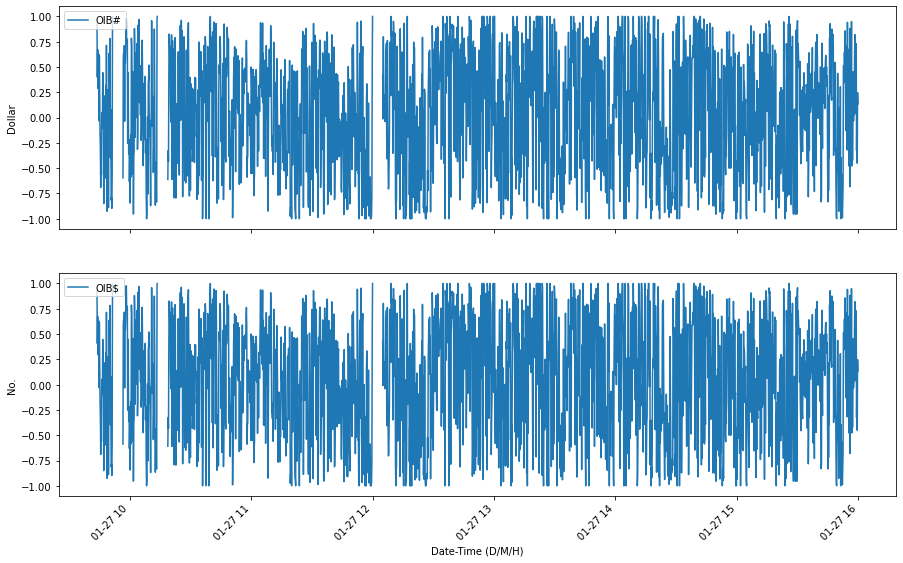

In [35]:
# plt.figure(figsize=(25,5))
# plt.plot(data_intvl['Date-Time'], data_intvl['OIB#'], label = 'OIB#')
# plt.plot(data_intvl['Date-Time'],data_intvl['OIB$'], label = 'OIB$')
# plt.legend()

fig, ax = plt.subplots(2,1, figsize=(15,10))
fig.autofmt_xdate()
ax[0].plot(data_intvl['Date-Time'], data_intvl['OIB#'], label = 'OIB#')
ax[0].legend()
plt.xlabel('Date-Time (D/M/H)')
plt.xticks(rotation=45)
ax[0].set_ylabel('Dollar')
ax[1].plot(data_intvl['Date-Time'],data_intvl['OIB$'], label = 'OIB$')
ax[1].set_ylabel('No.')
ax[1].legend()

## Variance ratio

## Basic Regression

10 seconds returns are computed using the midpoints of the first and last quotes within each 10 seconds trading interval

In [36]:
# calculate return
# data_intvl['Returns'] = data_intvl['first_midquote']-data_intvl['last_midquote']
data_intvl['Returns'] = (data_intvl['last_midquote']/data_intvl['last_midquote'].shift(1))-1
data_intvl

Date-Time  dollar_seller  dollar_buyer  No_seller  \
0    2021-01-27 09:43:50-05:00      14768.150    409496.220         49   
1    2021-01-27 09:44:00-05:00      41226.000     97850.820        136   
2    2021-01-27 09:44:10-05:00      23336.510    119680.120         74   
3    2021-01-27 09:44:20-05:00      55616.065    102192.645        175   
4    2021-01-27 09:44:30-05:00       9013.820     23783.745         29   
...                        ...            ...           ...        ...   
2252 2021-01-27 15:59:10-05:00      60226.760     30653.075        173   
2253 2021-01-27 15:59:20-05:00      51052.415     49316.105        146   
2254 2021-01-27 15:59:30-05:00      79191.525     30039.040        227   
2255 2021-01-27 15:59:40-05:00      45961.775     76121.525        132   
2256 2021-01-27 15:59:50-05:00      65612.870     86242.265        189   

      No_buyer  Quote_spread_V  Relative_Quote_spread_V  Effective_spread_V  \
0         1368     33827962.19            117428.012502        54555.433604   
1          317       195476.81               639.333753          571.686544   
2          379       124540.11               397.249834          367.456952   
3          317       144638.70               452.929426          386.904820   
4           75        46894.53               149.359187           73.415828   
...        ...             ...                      ...                 ...   
2252        88        17988.11                51.618839           37.529442   
2253       141        11072.04                31.666026           24.747892   
2254        86        22395.09                64.123909           45.835966   
2255       218        50352.34               144.437982          112.996243   
2256       248        47002.93               135.091835           89.914195   

         Volume  first_midquote  last_midquote  intvl Quote spread  \
0     1533799.0         287.500        307.000           22.055016   
1       26233.0         307.000        310.960            7.451561   
2       35530.0         310.960        317.535            3.505210   
3       51490.0         317.535        314.170            2.809064   
4        4037.0         314.170        313.415           11.616183   
...         ...             ...            ...                 ...   
2252    23632.0         349.125        349.220            0.761176   
2253    26682.0         349.375        349.850            0.414963   
2254    28696.0         349.850        348.150            0.780425   
2255    30273.0         348.150        349.630            1.663276   
2256    26943.0         349.630        345.920            1.744532   

      intvl Relative Quote spread  intvl Effective spread      OIB#      OIB$  \
0                        0.076560                0.035569  0.930840  0.930382   
1                        0.024371                0.021793  0.399558  0.407148   
2                        0.011181                0.010342  0.673289  0.673653   
3                        0.008796                0.007514  0.288618  0.295146   
4                        0.036998                0.018186  0.442308  0.450336   
...                           ...                     ...       ...       ...   
2252                     0.002184                0.001588 -0.325670 -0.325415   
2253                     0.001187                0.000928 -0.017422 -0.017299   
2254                     0.002235                0.001597 -0.450479 -0.449988   
2255                     0.004771                0.003733  0.245714  0.247042   
2256                     0.005014                0.003337  0.135011  0.135849   

       Returns  
0          NaN  
1     0.012899  
2     0.021144  
3    -0.010597  
4    -0.002403  
...        ...  
2252  0.000272  
2253  0.001804  
2254 -0.004859  
2255  0.004251  
2256 -0.010611  

[2257 rows x 17 columns]

### Descriptive statistics

In [37]:
# data_intvl = data_intvl[ np.isfinite( data_intvl ).all( axis = 1) ]
data_intvl.describe(include='float64')



dollar_seller   dollar_buyer  Quote_spread_V  Relative_Quote_spread_V  \
count    2257.000000    2257.000000    2.257000e+03              2257.000000   
mean    15249.682549   16476.199311    2.398642e+04                79.810784   
std     23686.157208   21180.958259    7.120268e+05              2471.652083   
min         0.000000       0.000000    0.000000e+00                 0.000000   
25%      3174.620000    3676.400000    1.877510e+03                 5.743033   
50%      8809.410000    9600.830000    4.397610e+03                13.491325   
75%     18921.580000   21317.610000    9.916650e+03                30.287966   
max    392720.960000  409496.220000    3.382796e+07            117428.012502   

       Effective_spread_V        Volume  first_midquote  last_midquote  \
count         2257.000000  2.257000e+03     2168.000000    2168.000000   
mean            42.813100  4.660619e+03      327.533519     327.542401   
std           1148.661707  3.272930e+04       23.141739      23.146582   
min              0.000000  0.000000e+00      249.620000     249.660000   
25%              2.744636  1.056000e+03      316.022500     316.223750   
50%              7.290298  2.353000e+03      328.627500     328.587500   
75%             18.897817  4.711000e+03      341.758750     341.771250   
max          54555.433604  1.533799e+06      379.020000     378.560000   

       intvl Quote spread  intvl Relative Quote spread  \
count         2168.000000                  2168.000000   
mean             2.207127                     0.006784   
std              1.208174                     0.003843   
min              0.129087                     0.000517   
25%              1.426555                     0.004315   
50%              1.950559                     0.006038   
75%              2.718580                     0.008325   
max             22.055016                     0.076560   

       intvl Effective spread         OIB#         OIB$      Returns  
count             2168.000000  2168.000000  2168.000000  2164.000000  
mean                 0.003909     0.053379     0.054120     0.000055  
std                  0.002679     0.575187     0.575166     0.007732  
min                  0.000256    -1.000000    -1.000000    -0.063958  
25%                  0.002151    -0.405518    -0.403756    -0.002872  
50%                  0.003203     0.100000     0.101322     0.000131  
75%                  0.004888     0.525464     0.526610     0.003095  
max                  0.035569     1.000000     1.000000     0.066003

In [38]:
# plt.figure(figsize = (10,8))
# sns.heatmap(, vmax= 1, vmin =-1, annot = True)

data_intvl.corr()

dollar_seller  dollar_buyer  No_seller  No_buyer  \
dollar_seller                     1.000000      0.159567   0.991394  0.157567   
dollar_buyer                      0.159567      1.000000   0.142919  0.993116   
No_seller                         0.991394      0.142919   1.000000  0.147330   
No_buyer                          0.157567      0.993116   0.147330  1.000000   
Quote_spread_V                    0.013531      0.399218   0.014015  0.433098   
Relative_Quote_spread_V           0.012340      0.398252   0.013075  0.432269   
Effective_spread_V                0.021356      0.402115   0.022127  0.436314   
Volume                            0.105940      0.467411   0.104970  0.499256   
first_midquote                    0.007891      0.048803  -0.061109 -0.030336   
last_midquote                    -0.044374      0.090511  -0.111271  0.011753   
intvl Quote spread                0.186223      0.182093   0.173961  0.199327   
intvl Relative Quote spread       0.183216      0.192521   0.181772  0.221420   
intvl Effective spread            0.293581      0.191096   0.291548  0.215943   
OIB#                             -0.411652      0.420080  -0.393927  0.417062   
OIB$                             -0.411473      0.420365  -0.393746  0.417354   
Returns                          -0.491961      0.359233  -0.478720  0.366284   

                             Quote_spread_V  Relative_Quote_spread_V  \
dollar_seller                      0.013531                 0.012340   
dollar_buyer                       0.399218                 0.398252   
No_seller                          0.014015                 0.013075   
No_buyer                           0.433098                 0.432269   
Quote_spread_V                     1.000000                 0.999996   
Relative_Quote_spread_V            0.999996                 1.000000   
Effective_spread_V                 0.999884                 0.999865   
Volume                             0.986645                 0.986397   
first_midquote                    -0.037665                -0.038793   
last_midquote                     -0.020040                -0.021109   
intvl Quote spread                 0.361764                 0.360825   
intvl Relative Quote spread        0.398836                 0.398124   
intvl Effective spread             0.265852                 0.264883   
OIB#                               0.030548                 0.030753   
OIB$                               0.030513                 0.030718   
Returns                           -0.189003                -0.183717   

                             Effective_spread_V    Volume  first_midquote  \
dollar_seller                          0.021356  0.105940        0.007891   
dollar_buyer                           0.402115  0.467411        0.048803   
No_seller                              0.022127  0.104970       -0.061109   
No_buyer                               0.436314  0.499256       -0.030336   
Quote_spread_V                         0.999884  0.986645       -0.037665   
Relative_Quote_spread_V                0.999865  0.986397       -0.038793   
Effective_spread_V                     1.000000  0.987896       -0.040264   
Volume                                 0.987896  1.000000       -0.038090   
first_midquote                        -0.040264 -0.038090        1.000000   
last_midquote                         -0.022934 -0.022402        0.994097   
intvl Quote spread                     0.364838  0.353804       -0.026216   
intvl Relative Quote spread            0.402321  0.391339       -0.162901   
intvl Effective spread                 0.273009  0.286480       -0.162552   
OIB#                                   0.029093  0.024126       -0.030306   
OIB$                                   0.029062  0.024118       -0.030408   
Returns                               -0.190209 -0.110362       -0.045067   

                             last_midquote  intvl Quote spread  \
dollar_seller                    -0.044374        

In [39]:

#Define low liquidity of intvl effective sprerad < mean effective spread 

data_intvl['ILD'] = 0
data_intvl.loc[(data_intvl['intvl Effective spread'] > 0.003909+0.002679), 'ILD'] = 1

# # Create linear Regression model by using 2 X dimension i.e. OIB$(t-1) and OIB$(t-1)*ILD
# X = pd.DataFrame() 
# X['OIBS'] = data_intvl['OIB$'].shift(1)
# X['OIB'] = data_intvl['OIB#'].shift(1)
# X = X.drop(0, 0).reset_index().drop('index',1) 
# X['OIBSILD'] = X['OIBS']*data_intvl['ILD']
# X.dropna(inplace=True)
# X = X[ np.isfinite( X ).all( axis = 1) ]
# y = pd.DataFrame()
# y['Returns'] = data_intvl['Returns']
# y = y[ np.isfinite( y ).all( axis = 1) ]
# trn = X.merge(y, left_index=True, right_index=True)

# X_train = trn.drop('Returns',1)
# y_train = trn["Returns"]

# Create linear Regression model by using 2 X dimension i.e. OIB$(t-1) and OIB$(t-1)*ILD
X = pd.DataFrame() 
X['OIB'] = data_intvl['OIB$'].shift(1)
X = X.drop(0, 0).reset_index().drop('index',1) 
X['OIBILD'] = X['OIB']*data_intvl['ILD']
X = X[ np.isfinite( X ).all( axis = 1) ]
y = pd.DataFrame()
y['Returns'] = data_intvl['Returns']
y = y[ np.isfinite( y ).all( axis = 1) ]
trn = X.merge(y, left_index=True, right_index=True)

X_train = trn.drop('Returns',1)
y_train = trn["Returns"]


#Create linear regression model

linr =  LinearRegression().fit(X_train, y_train)
r_square = linr.score(X_train, y_train)
r_square

#Create linear regression model

# linr =  LinearRegression().fit(X_train, y_train)
# r_square = linr.score(X_train, y_train)
# r_square

X


OIB    OIBILD
0     0.930382  0.930382
1     0.407148  0.407148
2     0.673653  0.673653
3     0.295146  0.295146
4     0.450336  0.450336
...        ...       ...
2251  0.729594  0.000000
2252 -0.325415 -0.000000
2253 -0.017299 -0.000000
2254 -0.449988 -0.000000
2255  0.247042  0.000000

[2167 rows x 2 columns]

In [40]:
# CALCULATE the ESPR in liquid and illiquidity day
data_intvl.groupby('ILD').mean()


dollar_seller  dollar_buyer  No_seller   No_buyer  Quote_spread_V  \
ILD                                                                      
0     13178.776372  15789.925803  40.377016  47.753528     6430.775494   
1     30299.784575  21463.622905  96.208791  68.344322   151570.285714   

     Relative_Quote_spread_V  Effective_spread_V        Volume  \
ILD                                                              
0                  19.622010           12.015349   3589.035786   
1                 517.226634          266.632646  12448.245421   

     first_midquote  last_midquote  intvl Quote spread  \
ILD                                                      
0        328.559417     328.673269            1.931600   
1        320.412363     319.692601            4.119672   

     intvl Relative Quote spread  intvl Effective spread      OIB#      OIB$  \
ILD                                                                            
0                       0.005900                0.003143  0.087468  0.088134   
1                       0.012922                0.009223 -0.183242 -0.181979   

      Returns  
ILD            
0    0.000401  
1   -0.002381

In [41]:
data_intvl.groupby('ILD').std()

dollar_seller  dollar_buyer   No_seller    No_buyer  Quote_spread_V  \
ILD                                                                        
0     19725.758747  18471.821750   65.843424   54.929701    8.954461e+03   
1     39470.380397  34713.907241  128.534773  114.260500    2.045923e+06   

     Relative_Quote_spread_V  Effective_spread_V        Volume  \
ILD                                                              
0                  27.782960           20.488157   5526.187070   
1                7102.478994         3298.969144  92697.523008   

     first_midquote  last_midquote  intvl Quote spread  \
ILD                                                      
0         22.578692      22.600542            0.806419   
1         25.661881      25.316365            1.703153   

     intvl Relative Quote spread  intvl Effective spread      OIB#      OIB$  \
ILD                                                                            
0                       0.002474                0.001427  0.549724  0.549669   
1                       0.005634                0.003250  0.683534  0.683908   

      Returns  
ILD            
0    0.006333  
1    0.013868

In [42]:
data_intvl.groupby('ILD').count()

Date-Time  dollar_seller  dollar_buyer  No_seller  No_buyer  \
ILD                                                                
0         1984           1984          1984       1984      1984   
1          273            273           273        273       273   

     Quote_spread_V  Relative_Quote_spread_V  Effective_spread_V  Volume  \
ILD                                                                        
0              1984                     1984                1984    1984   
1               273                      273                 273     273   

     first_midquote  last_midquote  intvl Quote spread  \
ILD                                                      
0              1895           1895                1895   
1               273            273                 273   

     intvl Relative Quote spread  intvl Effective spread  OIB#  OIB$  Returns  
ILD                                                                            
0                           1895                    1895  1895  1895     1895  
1                            273                     273   273   273      269

In [43]:
from statsmodels.formula.api import ols
lm1 = ols('Returns~ OIB',data=trn).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     701.2
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          4.65e-134
Time:                        20:30:20   Log-Likelihood:                 7752.9
No. Observations:                2163   AIC:                        -1.550e+04
Df Residuals:                    2161   BIC:                        -1.549e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0003      0.000     -2.065      0.039      -0.001    -1.5e-05
OIB            0.0067      0.000     26.480      0.000       0.006       0.007
==============================================================================
Omnibus:                      474.965   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18632.888
Skew:                          -0.131   Prob(JB):                         0.00
Kurtosis:                      17.376   Cond. No.                         1.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
lm2 = ols('Returns~ OIB+OIBILD',data=trn).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     403.0
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          1.82e-149
Time:                        20:30:20   Log-Likelihood:                 7792.0
No. Observations:                2163   AIC:                        -1.558e+04
Df Residuals:                    2160   BIC:                        -1.556e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0001      0.000     -0.760      0.447      -0.000       0.000
OIB            0.0056      0.000     20.191      0.000       0.005       0.006
OIBILD         0.0057      0.001      8.910      0.000       0.004       0.007
==============================================================================
Omnibus:                      454.716   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15606.114
Skew:                          -0.127   Prob(JB):                         0.00
Kurtosis:                      16.157   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
trn = X.merge(data_intvl['intvl Effective spread'], left_index=True, right_index=True)
trn
# test if the intvl Effective spread is predictive of the future OIB$ in (100s)
grangercausalitytests(trn[['OIBILD', 'intvl Effective spread']], maxlag=[10])


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.2548  , p=0.0129  , df_denom=2136, df_num=10
ssr based chi2 test:   chi2=22.7699 , p=0.0116  , df=10
likelihood ratio test: chi2=22.6505 , p=0.0121  , df=10
parameter F test:         F=2.2548  , p=0.0129  , df_denom=2136, df_num=10


{10: ({'ssr_ftest': (2.254820502925924, 0.012872689277143608, 2136.0, 10),
   'ssr_chi2test': (22.76988682027724, 0.011628583980774243, 10),
   'lrtest': (22.650543365003614, 0.012112630234408483, 10),
   'params_ftest': (2.254820502925436, 0.012872689277164692, 2136.0, 10.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
    

In [46]:
grangercausalitytests(trn[['intvl Effective spread','OIBILD' ]], maxlag=[10])


Granger Causality
number of lags (no zero) 10
ssr based F test:         F=2.3789  , p=0.0084  , df_denom=2136, df_num=10
ssr based chi2 test:   chi2=24.0231 , p=0.0075  , df=10
likelihood ratio test: chi2=23.8903 , p=0.0079  , df=10
parameter F test:         F=2.3789  , p=0.0084  , df_denom=2136, df_num=10


{10: ({'ssr_ftest': (2.378917973786991, 0.008432127864915089, 2136.0, 10),
   'ssr_chi2test': (24.023062122933236, 0.007539411616577331, 10),
   'lrtest': (23.8902716593293, 0.0078970303751707, 10),
   'params_ftest': (2.3789179737867534, 0.008432127864922584, 2136.0, 10.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
      

# 29 Jan 2021

In [47]:
data = pd.read_csv("29 Jan.csv", delimiter = ',')


data['Date-Time'] = data['Date-Time'].apply(lambda data: pd.to_datetime(data, infer_datetime_format=True) )
data = data.drop(['Unnamed: 0', 'Tick Dir.','num_tick_direction'], 1)






In [48]:
index_names_1 = data[(data['Type'] == 'Quote') ].index
data.drop(index_names_1, inplace=True)

index_names_2 = data[(data['Bid Price'] > data['Ask Price'])].index
data.drop(index_names_2, inplace=True)

index_names_3 = data[(data['Price'] > data['Ask Price'])].index
data.drop(index_names_3, inplace=True)


#create num tick direction
data['diff Price/Bid'] = np.absolute(data['Price'] - data['Bid Price'])
data['diff Price/Ask'] = np.absolute(data['Price'] - data['Ask Price'])

data['Tick Dir'] = 1
data.loc[abs(data['diff Price/Bid']) < abs(data['diff Price/Ask']), 'Tick Dir'] = -1



#Calculate Quote Spread
data['Quote spread'] = (data['Ask Price'] - data['Bid Price'])
#Calculate Mid quote
data['Mid quote'] = (data['Ask Price'] + data['Bid Price'])/2
#Calculate relative Quote Spread
data['Relative Quote spread'] = data['Quote spread']/data['Mid quote']
#Calculate effective spread
data['Effective spread'] = np.absolute(2*(data['Price']-data['Mid quote'])/data['Mid quote'])




data


#RIC        Domain                           Date-Time   Type  Price  \
3       GME.N  Market Price 2021-01-29 09:30:11.790758682-05:00  Trade  380.0   
4       GME.N  Market Price 2021-01-29 09:30:11.790758682-05:00  Trade  380.0   
5       GME.N  Market Price 2021-01-29 09:30:11.790758682-05:00  Trade  380.0   
6       GME.N  Market Price 2021-01-29 09:30:11.790758682-05:00  Trade  380.0   
7       GME.N  Market Price 2021-01-29 09:30:11.790758682-05:00  Trade  380.0   
...       ...           ...                                 ...    ...    ...   
332342  GME.N  Market Price 2021-01-29 15:59:59.875667050-05:00  Trade  328.0   
332344  GME.N  Market Price 2021-01-29 15:59:59.887567967-05:00  Trade  328.0   
332345  GME.N  Market Price 2021-01-29 15:59:59.936339122-05:00  Trade  328.0   
332348  GME.N  Market Price 2021-01-29 15:59:59.952164056-05:00  Trade  328.0   
332350  GME.N  Market Price 2021-01-29 15:59:59.984096412-05:00  Trade  328.0   

        Volume  Bid Price  Bid Size  Ask Price  Ask Size        Date  \
3          4.0     379.97       1.0     380.00       6.0  2021-01-29   
4          5.0     379.97       1.0     380.00       6.0  2021-01-29   
5          1.0     379.97       1.0     380.00       6.0  2021-01-29   
6          1.0     379.97       1.0     380.00       6.0  2021-01-29   
7          2.0     379.97       1.0     380.00       6.0  2021-01-29   
...        ...        ...       ...        ...       ...         ...   
332342    15.0     328.00      23.0     328.48       1.0  2021-01-29   
332344    10.0     328.00      23.0     328.48       1.0  2021-01-29   
332345     1.0     328.00      23.0     328.48       1.0  2021-01-29   
332348    10.0     328.00      23.0     328.48       1.0  2021-01-29   
332350     1.0     328.00      23.0     328.48       1.0  2021-01-29   

                Exchange_Time  diff Price/Bid  diff Price/Ask  Tick Dir  \
3       09:30:11.790758682-05            0.03            0.00         1   
4       09:30:11.790758682-05            0.03            0.00         1   
5       09:30:11.790758682-05            0.03            0.00         1   
6       09:30:11.790758682-05            0.03            0.00         1   
7       09:30:11.790758682-05            0.03            0.00         1   
...                       ...             ...             ...       ...   
332342  15:59:59.875667050-05            0.00            0.48        -1   
332344  15:59:59.887567967-05            0.00            0.48        -1   
332345  15:59:59.936339122-05            0.00            0.48        -1   
332348  15:59:59.952164056-05            0.00            0.48        -1   
332350  15:59:59.984096412-05            0.00            0.48        -1   

        Quote spread  Mid quote  Relative Quote spread  Effective spread  
3               0.03    379.985               0.000079          0.000079  
4               0.03    379.985               0.000079          0.000079  
5               0.03    379.985               0.000079          0.000079  
6               0.03    379.985               0.000079          0.000079  
7               0.03    379.985               0.000079          0.000079  
...              ...        ...                    ...               ...  
332342          0.48    328.240               0.001462          0.001462  
332344          0.48    328.240               0.001462          0.001462  
332345          0.48    328.240               0.001462          0.001462  
332348          0.48    328.240               0.001462          0.001462  
332350          0.48    328.240               0.001462          0.001462  

[194001 rows x 19 columns]

## Calculate Quoted spread and Effective Spread by use the volumn average in each Time interval (1 Seconds)

In [49]:
data['Quote_spread_V'] = data['Quote spread']*data['Volume']
data['Relative_Quote_spread_V'] = data['Relative Quote spread']*data['Volume']
data['Effective_spread_V'] = data['Effective spread']*data['Volume']

In [50]:
Quote_spread_V = data.resample('10S', on='Date-Time')['Quote_spread_V'].sum()

Relative_Quote_spread_V = data.resample('10S', on='Date-Time')['Relative_Quote_spread_V'].sum()

Effective_spread_V = data.resample('10S', on='Date-Time')['Effective_spread_V'].sum()

sum_volume = data.resample('10S', on='Date-Time')['Volume'].sum()

first_midquote = data.resample('10S', on='Date-Time')['Mid quote'].first()

last_midquote = data.resample('10S', on='Date-Time')['Mid quote'].last()

data_intvl = pd.concat([Quote_spread_V,Relative_Quote_spread_V,Effective_spread_V, sum_volume,first_midquote,last_midquote], 
                       keys=['Quote_spread_V','Relative_Quote_spread_V','Effective_spread_V', 'Volume','first_midquote','last_midquote'], axis=1)

data_intvl
data_intvl = data_intvl.reset_index(level=0)
# data_intvl['Quote Spread']
data_intvl

Date-Time  Quote_spread_V  Relative_Quote_spread_V  \
0    2021-01-29 09:30:10-05:00        44310.00               116.528550   
1    2021-01-29 09:30:20-05:00       224082.95               581.999008   
2    2021-01-29 09:30:30-05:00        78377.35               198.914580   
3    2021-01-29 09:30:40-05:00        83197.56               210.454723   
4    2021-01-29 09:30:50-05:00        15624.23                39.374157   
...                        ...             ...                      ...   
2334 2021-01-29 15:59:10-05:00         7350.05                22.323057   
2335 2021-01-29 15:59:20-05:00         6768.06                20.546515   
2336 2021-01-29 15:59:30-05:00        15623.27                47.562471   
2337 2021-01-29 15:59:40-05:00         1670.53                 5.083719   
2338 2021-01-29 15:59:50-05:00         4718.50                14.367705   

      Effective_spread_V   Volume  first_midquote  last_midquote  
0              72.554008  14975.0         379.985        381.120  
1             485.749662  36575.0         381.120        391.410  
2             136.205062  21722.0         392.910        389.975  
3             154.037134  12686.0         389.975        397.225  
4              18.124133   7610.0         397.225        393.475  
...                  ...      ...             ...            ...  
2334           16.168743  10013.0         329.475        328.995  
2335           16.514068  10960.0         329.495        328.970  
2336           39.606714  19954.0         328.970        328.235  
2337            2.356957   3751.0         328.235        328.495  
2338            9.572455  12732.0         328.495        328.240  

[2339 rows x 7 columns]

In [51]:
# Calculate avg spread

# Volume avg Quoted spread
data_intvl['intvl Quote spread'] = data_intvl['Quote_spread_V']/data_intvl['Volume']
data_intvl['intvl Relative Quote spread'] = data_intvl['Relative_Quote_spread_V']/data_intvl['Volume']
data_intvl['intvl Effective spread'] = data_intvl['Effective_spread_V']/data_intvl['Volume']
data_intvl

Date-Time  Quote_spread_V  Relative_Quote_spread_V  \
0    2021-01-29 09:30:10-05:00        44310.00               116.528550   
1    2021-01-29 09:30:20-05:00       224082.95               581.999008   
2    2021-01-29 09:30:30-05:00        78377.35               198.914580   
3    2021-01-29 09:30:40-05:00        83197.56               210.454723   
4    2021-01-29 09:30:50-05:00        15624.23                39.374157   
...                        ...             ...                      ...   
2334 2021-01-29 15:59:10-05:00         7350.05                22.323057   
2335 2021-01-29 15:59:20-05:00         6768.06                20.546515   
2336 2021-01-29 15:59:30-05:00        15623.27                47.562471   
2337 2021-01-29 15:59:40-05:00         1670.53                 5.083719   
2338 2021-01-29 15:59:50-05:00         4718.50                14.367705   

      Effective_spread_V   Volume  first_midquote  last_midquote  \
0              72.554008  14975.0         379.985        381.120   
1             485.749662  36575.0         381.120        391.410   
2             136.205062  21722.0         392.910        389.975   
3             154.037134  12686.0         389.975        397.225   
4              18.124133   7610.0         397.225        393.475   
...                  ...      ...             ...            ...   
2334           16.168743  10013.0         329.475        328.995   
2335           16.514068  10960.0         329.495        328.970   
2336           39.606714  19954.0         328.970        328.235   
2337            2.356957   3751.0         328.235        328.495   
2338            9.572455  12732.0         328.495        328.240   

      intvl Quote spread  intvl Relative Quote spread  intvl Effective spread  
0               2.958932                     0.007782                0.004845  
1               6.126670                     0.015912                0.013281  
2               3.608201                     0.009157                0.006270  
3               6.558219                     0.016590                0.012142  
4               2.053118                     0.005174                0.002382  
...                  ...                          ...                     ...  
2334            0.734051                     0.002229                0.001615  
2335            0.617524                     0.001875                0.001507  
2336            0.782964                     0.002384                0.001985  
2337            0.445356                     0.001355                0.000628  
2338            0.370602                     0.001128                0.000752  

[2339 rows x 10 columns]

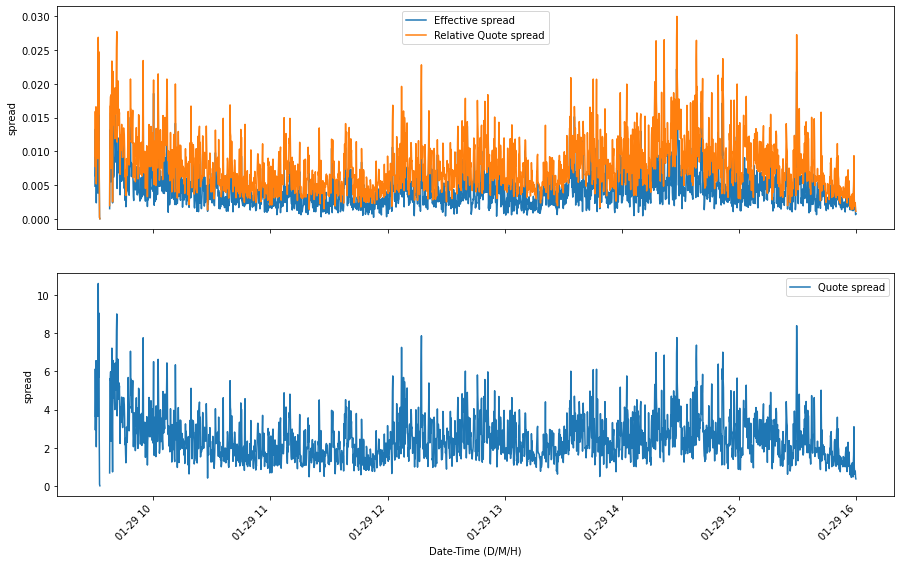

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

fig, ax = plt.subplots(2,1, figsize=(15,10))
fig.autofmt_xdate()
ax[0].plot(data_intvl['Date-Time'], data_intvl['intvl Effective spread'], label = 'Effective spread')
ax[0].plot(data_intvl['Date-Time'],data_intvl['intvl Relative Quote spread'], label = 'Relative Quote spread')
ax[0].legend()
plt.xlabel('Date-Time (D/M/H)')
plt.xticks(rotation=45)
ax[0].set_ylabel('spread')
ax[1].plot(data_intvl['Date-Time'],data_intvl['intvl Quote spread'], label = 'Quote spread')
ax[1].set_ylabel('spread')
ax[1].legend()


## Market efficiency Proxy

In [53]:
data2 = data[['Price', 'Tick Dir', 'Date-Time']]
data2 = data2.groupby('Tick Dir')
num_tick_ = data2.resample('10S', on='Date-Time').count()
num_tick_sum = data2.resample('10S', on='Date-Time').sum()
num_tick_sum
data_buyer = num_tick_.loc[1 , :]
data_seller = num_tick_.loc[-1 , :]
No_buyer = data_buyer['Tick Dir']
No_buyer = No_buyer.reset_index(level=0)
No_seller = data_seller['Tick Dir']
No_seller = No_seller.reset_index(level=0)
No_seller


data_buyer_sum = num_tick_sum.loc[1 , :]
data_seller_sum = num_tick_sum.loc[-1 , :]
dollar_buyer = data_buyer_sum['Price']
dollar_buyer = dollar_buyer.reset_index(level=0)
dollar_seller = data_seller_sum['Price']
dollar_seller = dollar_seller.reset_index(level=0)


In [54]:

data_intvl.insert(1, "No_buyer", No_buyer['Tick Dir'])
data_intvl.insert(1, "No_seller", No_seller['Tick Dir'])
data_intvl.insert(1, "dollar_buyer", dollar_buyer['Price'])
data_intvl.insert(1, "dollar_seller", dollar_seller['Price'])


In [55]:
data_intvl['OIB#'] = (data_intvl['No_buyer']-data_intvl['No_seller'])/(data_intvl['No_buyer']+data_intvl['No_seller'])
data_intvl['OIB$'] = (data_intvl['dollar_buyer']-data_intvl['dollar_seller'])/(data_intvl['dollar_buyer']+data_intvl['dollar_seller'])

In [56]:
data_intvl

Date-Time  dollar_seller  dollar_buyer  No_seller  \
0    2021-01-29 09:30:10-05:00      123036.82    167975.300        324   
1    2021-01-29 09:30:20-05:00       41767.89    269025.260        110   
2    2021-01-29 09:30:30-05:00       58932.04    236927.640        150   
3    2021-01-29 09:30:40-05:00       30433.50    208326.360         77   
4    2021-01-29 09:30:50-05:00       42393.72    162102.360        107   
...                        ...            ...           ...        ...   
2334 2021-01-29 15:59:10-05:00       69736.65     48732.190        212   
2335 2021-01-29 15:59:20-05:00       86228.85     49384.330        262   
2336 2021-01-29 15:59:30-05:00       83704.53     55855.095        255   
2337 2021-01-29 15:59:40-05:00       29884.31     38447.165         91   
2338 2021-01-29 15:59:50-05:00       78471.09     69966.380        239   

      No_buyer  Quote_spread_V  Relative_Quote_spread_V  Effective_spread_V  \
0          441        44310.00               116.528550           72.554008   
1          694       224082.95               581.999008          485.749662   
2          599        78377.35               198.914580          136.205062   
3          525        83197.56               210.454723          154.037134   
4          408        15624.23                39.374157           18.124133   
...        ...             ...                      ...                 ...   
2334       148         7350.05                22.323057           16.168743   
2335       150         6768.06                20.546515           16.514068   
2336       170        15623.27                47.562471           39.606714   
2337       117         1670.53                 5.083719            2.356957   
2338       213         4718.50                14.367705            9.572455   

       Volume  first_midquote  last_midquote  intvl Quote spread  \
0     14975.0         379.985        381.120            2.958932   
1     36575.0         381.120        391.410            6.126670   
2     21722.0         392.910        389.975            3.608201   
3     12686.0         389.975        397.225            6.558219   
4      7610.0         397.225        393.475            2.053118   
...       ...             ...            ...                 ...   
2334  10013.0         329.475        328.995            0.734051   
2335  10960.0         329.495        328.970            0.617524   
2336  19954.0         328.970        328.235            0.782964   
2337   3751.0         328.235        328.495            0.445356   
2338  12732.0         328.495        328.240            0.370602   

      intvl Relative Quote spread  intvl Effective spread      OIB#      OIB$  
0                        0.007782                0.004845  0.152941  0.154421  
1                        0.015912                0.013281  0.726368  0.731217  
2                        0.009157                0.006270  0.599466  0.601622  
3                        0.016590                0.012142  0.744186  0.745070  
4                        0.005174                0.002382  0.584466  0.585384  
...                           ...                     ...       ...       ...  
2334                     0.002229                0.001615 -0.177778 -0.177299  
2335                     0.001875                0.001507 -0.271845 -0.271688  
2336                     0.002384                0.001985 -0.200000 -0.199552  
2337                     0.001355                0.000628  0.125000  0.125313  
2338                     0.001128                0.000752 -0.057522 -0.057295  

[2339 rows x 16 columns]

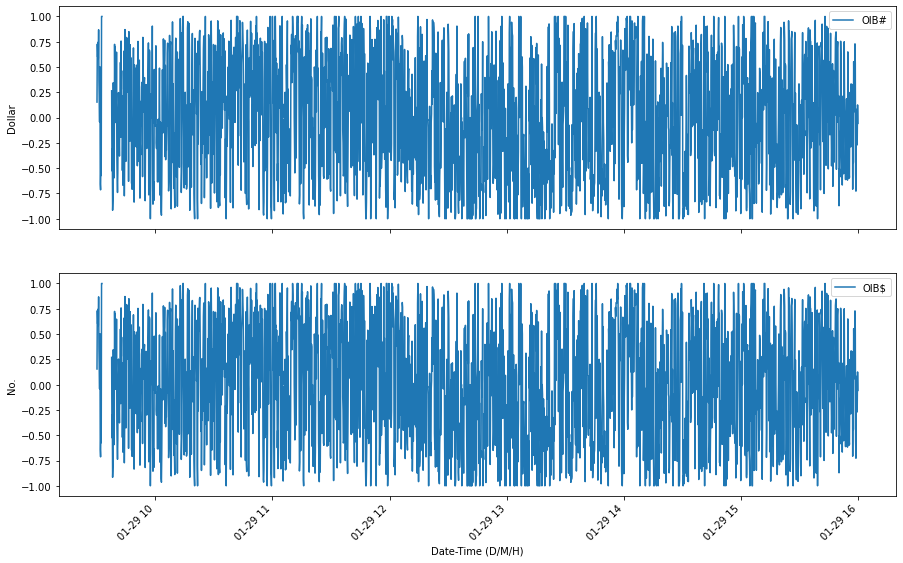

In [57]:
# plt.figure(figsize=(25,5))
# plt.plot(data_intvl['Date-Time'], data_intvl['OIB#'], label = 'OIB#')
# plt.plot(data_intvl['Date-Time'],data_intvl['OIB$'], label = 'OIB$')
# plt.legend()

fig, ax = plt.subplots(2,1, figsize=(15,10))
fig.autofmt_xdate()
ax[0].plot(data_intvl['Date-Time'], data_intvl['OIB#'], label = 'OIB#')
ax[0].legend()
plt.xlabel('Date-Time (D/M/H)')
plt.xticks(rotation=45)
ax[0].set_ylabel('Dollar')
ax[1].plot(data_intvl['Date-Time'],data_intvl['OIB$'], label = 'OIB$')
ax[1].set_ylabel('No.')
ax[1].legend()

## Variance ratio

## Basic Regression

10 seconds returns are computed using the midpoints of the first and last quotes within each 10 seconds trading interval

In [58]:
# calculate return
# data_intvl['Returns'] = data_intvl['first_midquote']-data_intvl['last_midquote']
data_intvl['Returns'] = (data_intvl['last_midquote']/data_intvl['last_midquote'].shift(1))-1
data_intvl

Date-Time  dollar_seller  dollar_buyer  No_seller  \
0    2021-01-29 09:30:10-05:00      123036.82    167975.300        324   
1    2021-01-29 09:30:20-05:00       41767.89    269025.260        110   
2    2021-01-29 09:30:30-05:00       58932.04    236927.640        150   
3    2021-01-29 09:30:40-05:00       30433.50    208326.360         77   
4    2021-01-29 09:30:50-05:00       42393.72    162102.360        107   
...                        ...            ...           ...        ...   
2334 2021-01-29 15:59:10-05:00       69736.65     48732.190        212   
2335 2021-01-29 15:59:20-05:00       86228.85     49384.330        262   
2336 2021-01-29 15:59:30-05:00       83704.53     55855.095        255   
2337 2021-01-29 15:59:40-05:00       29884.31     38447.165         91   
2338 2021-01-29 15:59:50-05:00       78471.09     69966.380        239   

      No_buyer  Quote_spread_V  Relative_Quote_spread_V  Effective_spread_V  \
0          441        44310.00               116.528550           72.554008   
1          694       224082.95               581.999008          485.749662   
2          599        78377.35               198.914580          136.205062   
3          525        83197.56               210.454723          154.037134   
4          408        15624.23                39.374157           18.124133   
...        ...             ...                      ...                 ...   
2334       148         7350.05                22.323057           16.168743   
2335       150         6768.06                20.546515           16.514068   
2336       170        15623.27                47.562471           39.606714   
2337       117         1670.53                 5.083719            2.356957   
2338       213         4718.50                14.367705            9.572455   

       Volume  first_midquote  last_midquote  intvl Quote spread  \
0     14975.0         379.985        381.120            2.958932   
1     36575.0         381.120        391.410            6.126670   
2     21722.0         392.910        389.975            3.608201   
3     12686.0         389.975        397.225            6.558219   
4      7610.0         397.225        393.475            2.053118   
...       ...             ...            ...                 ...   
2334  10013.0         329.475        328.995            0.734051   
2335  10960.0         329.495        328.970            0.617524   
2336  19954.0         328.970        328.235            0.782964   
2337   3751.0         328.235        328.495            0.445356   
2338  12732.0         328.495        328.240            0.370602   

      intvl Relative Quote spread  intvl Effective spread      OIB#      OIB$  \
0                        0.007782                0.004845  0.152941  0.154421   
1                        0.015912                0.013281  0.726368  0.731217   
2                        0.009157                0.006270  0.599466  0.601622   
3                        0.016590                0.012142  0.744186  0.745070   
4                        0.005174                0.002382  0.584466  0.585384   
...                           ...                     ...       ...       ...   
2334                     0.002229                0.001615 -0.177778 -0.177299   
2335                     0.001875                0.001507 -0.271845 -0.271688   
2336                     0.002384                0.001985 -0.200000 -0.199552   
2337                     0.001355                0.000628  0.125000  0.125313   
2338                     0.001128                0.000752 -0.057522 -0.057295   

       Returns  
0          NaN  
1     0.026999  
2    -0.003666  
3     0.018591  
4    -0.009440  
...        ...  
2334 -0.001457  
2335 -0.000076  
2336 -0.002234  
2337  0.000792  
2338 -0.000776  

[2339 rows x 17 columns]

### Descriptive statistics

In [59]:
# data_intvl = data_intvl[ np.isfinite( data_intvl ).all( axis = 1) ]
data_intvl.describe(include='float64')



dollar_seller   dollar_buyer  Quote_spread_V  Relative_Quote_spread_V  \
count    2339.000000    2339.000000     2339.000000              2339.000000   
mean    13851.331293   12732.247316     7740.559230                24.064928   
std     25123.861694   22091.258867    22496.351137                63.351659   
min         0.000000       0.000000        0.000000                 0.000000   
25%      2847.885000    3150.090000     1308.290000                 4.094724   
50%      6738.190000    7355.050000     3103.140000                 9.903389   
75%     14757.675000   15029.190000     6873.865000                22.073375   
max    365799.870000  635464.140000   663773.270000              1660.688081   

       Effective_spread_V         Volume  first_midquote  last_midquote  \
count         2339.000000    2339.000000     2310.000000    2310.000000   
mean            16.360881    2751.082514      317.638939     317.596485   
std             54.452290    5047.140176       24.655920      24.631010   
min              0.000000       0.000000      251.000000     250.995000   
25%              1.784766     634.000000      303.551250     303.597500   
50%              5.116939    1386.000000      321.870000     321.925000   
75%             13.176134    2812.500000      334.703750     334.660000   
max           1532.854473  101384.000000      411.980000     411.980000   

       intvl Quote spread  intvl Relative Quote spread  \
count         2310.000000                  2310.000000   
mean             2.505573                     0.007976   
std              1.201316                     0.003947   
min              0.010000                     0.000028   
25%              1.661068                     0.005155   
50%              2.252241                     0.007211   
75%              3.100004                     0.009985   
max             10.600376                     0.029960   

       intvl Effective spread         OIB#         OIB$      Returns  
count             2310.000000  2310.000000  2310.000000  2308.000000  
mean                 0.004347     0.007829     0.008550    -0.000021  
std                  0.002824     0.595931     0.595912     0.007772  
min                  0.000028    -1.000000    -1.000000    -0.086470  
25%                  0.002444    -0.514271    -0.513251    -0.002629  
50%                  0.003686     0.002538     0.005203     0.000093  
75%                  0.005443     0.531289     0.531678     0.002933  
max                  0.024567     1.000000     1.000000     0.083778

In [60]:

data_intvl.corr()

dollar_seller  dollar_buyer  No_seller  No_buyer  \
dollar_seller                     1.000000      0.371176   0.993998  0.364601   
dollar_buyer                      0.371176      1.000000   0.341144  0.994603   
No_seller                         0.993998      0.341144   1.000000  0.338907   
No_buyer                          0.364601      0.994603   0.338907  1.000000   
Quote_spread_V                    0.619102      0.399282   0.603730  0.382700   
Relative_Quote_spread_V           0.650966      0.391405   0.644838  0.381147   
Effective_spread_V                0.614045      0.348856   0.606245  0.335199   
Volume                            0.660373      0.535455   0.664223  0.535778   
first_midquote                    0.109489      0.173588   0.054068  0.120828   
last_midquote                     0.057794      0.193701   0.002213  0.142860   
intvl Quote spread                0.280030      0.134461   0.278597  0.133108   
intvl Relative Quote spread       0.239846      0.085717   0.251525  0.094840   
intvl Effective spread            0.394351      0.159675   0.407393  0.167959   
OIB#                             -0.361509      0.307248  -0.380020  0.329980   
OIB$                             -0.361133      0.307609  -0.379668  0.330345   
Returns                          -0.511148      0.293777  -0.515843  0.319936   

                             Quote_spread_V  Relative_Quote_spread_V  \
dollar_seller                      0.619102                 0.650966   
dollar_buyer                       0.399282                 0.391405   
No_seller                          0.603730                 0.644838   
No_buyer                           0.382700                 0.381147   
Quote_spread_V                     1.000000                 0.991763   
Relative_Quote_spread_V            0.991763                 1.000000   
Effective_spread_V                 0.986453                 0.988595   
Volume                             0.822776                 0.846382   
first_midquote                     0.113330                 0.072631   
last_midquote                      0.095425                 0.053144   
intvl Quote spread                 0.372261                 0.388440   
intvl Relative Quote spread        0.316573                 0.342619   
intvl Effective spread             0.464962                 0.498821   
OIB#                              -0.065297                -0.079162   
OIB$                              -0.064904                -0.078775   
Returns                           -0.172504                -0.189331   

                             Effective_spread_V    Volume  first_midquote  \
dollar_seller                          0.614045  0.660373        0.109489   
dollar_buyer                           0.348856  0.535455        0.173588   
No_seller                              0.606245  0.664223        0.054068   
No_buyer                               0.335199  0.535778        0.120828   
Quote_spread_V                         0.986453  0.822776        0.113330   
Relative_Quote_spread_V                0.988595  0.846382        0.072631   
Effective_spread_V                     1.000000  0.832823        0.076636   
Volume                                 0.832823  1.000000        0.083237   
first_midquote                         0.076636  0.083237        1.000000   
last_midquote                          0.055679  0.067656        0.995070   
intvl Quote spread                     0.338359  0.140980       -0.098957   
intvl Relative Quote spread            0.293803  0.107507       -0.283594   
intvl Effective spread                 0.477036  0.311524       -0.204017   
OIB#                                  -0.080333 -0.049304        0.013124   
OIB$                                  -0.079997 -0.049097        0.013071   
Returns                               -0.204701 -0.157418       -0.057555   

                             last_midquote  intvl Quote spread  \
dollar_seller                     0.057794        

In [61]:

#Define low liquidity of intvl effective sprerad < mean effective spread (0.007049)

data_intvl['ILD'] = 0
data_intvl.loc[(data_intvl['intvl Effective spread'] > 0.004347+0.002824), 'ILD'] = 1

# Create linear Regression model by using 2 X dimension i.e. OIB$(t-1) and OIB$(t-1)*ILD
# X = pd.DataFrame() 
# X['OIB'] = data_intvl['OIB#'].shift(1)
# X['OIBS'] = data_intvl['OIB$'].shift(1)
# X = X.drop(0, 0).reset_index().drop('index',1) 
# X['OIBSILD'] = X['OIBS']*data_intvl['ILD']
# X.dropna(inplace=True)
# X = X[ np.isfinite( X ).all( axis = 1) ]
# y = pd.DataFrame()
# y['Returns'] = data_intvl['Returns']
# y = y[ np.isfinite( y ).all( axis = 1) ]
# trn = X.merge(y, left_index=True, right_index=True)

# X_train = trn.drop('Returns',1)
# y_train = trn["Returns"]

# Create linear Regression model by using 2 X dimension i.e. OIB$(t-1) and OIB$(t-1)*ILD
X = pd.DataFrame() 
X['OIB'] = data_intvl['OIB$'].shift(1)
X = X.drop(0, 0).reset_index().drop('index',1) 
X['OIBILD'] = X['OIB']*data_intvl['ILD']
X = X[ np.isfinite( X ).all( axis = 1) ]
y = pd.DataFrame()
y['Returns'] = data_intvl['Returns']
y = y[ np.isfinite( y ).all( axis = 1) ]
trn = X.merge(y, left_index=True, right_index=True)

X_train = trn.drop('Returns',1)
y_train = trn["Returns"]


#Create linear regression model

linr =  LinearRegression().fit(X_train, y_train)
r_square = linr.score(X_train, y_train)
r_square
#Create linear regression model

linr =  LinearRegression().fit(X_train, y_train)
r_square = linr.score(X_train, y_train)
r_square




0.2481754293988898

In [62]:
# CALCULATE the ESPR in liquid and illiquidity day
data_intvl.groupby('ILD').mean()


dollar_seller  dollar_buyer   No_seller   No_buyer  Quote_spread_V  \
ILD                                                                       
0     10959.607788  11591.698784   34.434655  35.894273     4733.052227   
1     33810.085084  20604.344105  106.712838  63.283784    28498.453851   

     Relative_Quote_spread_V  Effective_spread_V       Volume  first_midquote  \
ILD                                                                             
0                  14.860749            8.900142  2280.610866      318.838560   
1                  87.592418           67.855103  5998.290541      309.476655   

     last_midquote  intvl Quote spread  intvl Relative Quote spread  \
ILD                                                                   
0       318.912296            2.229988                     0.007059   
1       308.643632            4.380669                     0.014215   

     intvl Effective spread      OIB#      OIB$   Returns  
ILD                                                        
0                  0.003516  0.035187  0.035844  0.000317  
1                  0.009999 -0.178316 -0.177164 -0.002321

In [63]:
data_intvl.groupby('ILD').std()

dollar_seller  dollar_buyer   No_seller   No_buyer  Quote_spread_V  \
ILD                                                                       
0     17940.857273  20230.308169   55.519486  58.456850     7365.499812   
1     48134.768840  31042.826597  143.636861  86.277836    56039.523059   

     Relative_Quote_spread_V  Effective_spread_V       Volume  first_midquote  \
ILD                                                                             
0                  22.852852           16.424589  3735.509353       23.268365   
1                 153.482832          136.329837  9653.289213       31.417561   

     last_midquote  intvl Quote spread  intvl Relative Quote spread  \
ILD                                                                   
0        23.275768            0.910937                     0.002998   
1        30.976289            1.259764                     0.003975   

     intvl Effective spread      OIB#      OIB$   Returns  
ILD                                                        
0                  0.001570  0.575823  0.575806  0.005981  
1                  0.002972  0.690823  0.690925  0.014915

In [64]:
data_intvl.groupby('ILD').count()

Date-Time  dollar_seller  dollar_buyer  No_seller  No_buyer  \
ILD                                                                
0         2043           2043          2043       2043      2043   
1          296            296           296        296       296   

     Quote_spread_V  Relative_Quote_spread_V  Effective_spread_V  Volume  \
ILD                                                                        
0              2043                     2043                2043    2043   
1               296                      296                 296     296   

     first_midquote  last_midquote  intvl Quote spread  \
ILD                                                      
0              2014           2014                2014   
1               296            296                 296   

     intvl Relative Quote spread  intvl Effective spread  OIB#  OIB$  Returns  
ILD                                                                            
0                           2014                    2014  2014  2014     2012  
1                            296                     296   296   296      296

In [65]:
from statsmodels.formula.api import ols
lm1 = ols('Returns~ OIB',data=trn).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     589.2
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          4.34e-116
Time:                        20:32:16   Log-Likelihood:                 8194.7
No. Observations:                2307   AIC:                        -1.639e+04
Df Residuals:                    2305   BIC:                        -1.637e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.005e-05      0.000     -0.485      0.628      -0.000       0.000
OIB            0.0059      0.000     24.273      0.000       0.005       0.006
==============================================================================
Omnibus:                      659.171   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51927.774
Skew:                          -0.354   Prob(JB):                         0.00
Kurtosis:                      26.232   Cond. No.                         1.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
lm2 = ols('Returns~ OIB+OIBILD',data=trn).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     380.3
Date:                Sat, 09 Apr 2022   Prob (F-statistic):          1.93e-143
Time:                        20:32:16   Log-Likelihood:                 8261.2
No. Observations:                2307   AIC:                        -1.652e+04
Df Residuals:                    2304   BIC:                        -1.650e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0001      0.000      0.735      0.463      -0.000       0.000
OIB            0.0046      0.000     17.502      0.000       0.004       0.005
OIBILD         0.0072      0.001     11.691      0.000       0.006       0.008
==============================================================================
Omnibus:                      616.888   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47266.150
Skew:                          -0.196   Prob(JB):                         0.00
Kurtosis:                      25.171   Cond. No.                         4.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
trn.corr()

OIB    OIBILD   Returns
OIB      1.000000  0.430873  0.451189
OIBILD   0.430873  1.000000  0.384991
Returns  0.451189  0.384991  1.000000

In [69]:
trn = X.merge(data_intvl['intvl Effective spread'], left_index=True, right_index=True)
trn = X.merge(data_intvl['intvl Effective spread'], left_index=True, right_index=True)
trn
# test if the intvl Effective spread is predictive of the future OIB$ in (100s)
grangercausalitytests(trn[['OIBILD', 'intvl Effective spread']], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5420  , p=0.0186  , df_denom=2305, df_num=1
ssr based chi2 test:   chi2=5.5492  , p=0.0185  , df=1
likelihood ratio test: chi2=5.5426  , p=0.0186  , df=1
parameter F test:         F=5.5420  , p=0.0186  , df_denom=2305, df_num=1


{1: ({'ssr_ftest': (5.5420291826515635, 0.018648534469437365, 2305.0, 1),
   'ssr_chi2test': (5.549242235817704, 0.018488689495630477, 1),
   'lrtest': (5.54258174656843, 0.018559183229713887, 1),
   'params_ftest': (5.5420291826484585, 0.0186485344694741, 2305.0, 1.0)},
   array([[0., 1., 0.]])])}

In [71]:
grangercausalitytests(trn[['intvl Effective spread','OIBILD' ]], maxlag=[1])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.4157  , p=0.0647  , df_denom=2305, df_num=1
ssr based chi2 test:   chi2=3.4201  , p=0.0644  , df=1
likelihood ratio test: chi2=3.4176  , p=0.0645  , df=1
parameter F test:         F=3.4157  , p=0.0647  , df_denom=2305, df_num=1


{1: ({'ssr_ftest': (3.415668789991501, 0.06470825892937895, 2305.0, 1),
   'ssr_chi2test': (3.4201143459003838, 0.06440655198800266, 1),
   'lrtest': (3.4175827949256927, 0.06450539895066114, 1),
   'params_ftest': (3.4156687899917, 0.06470825892935875, 2305.0, 1.0)},
   array([[0., 1., 0.]])])}